In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
dtypes = {
    "keyword": "category",
    "target": "bool",
}
tweets = pd.read_csv('Data/train.csv', dtype=dtypes)
tweets

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,True
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,True
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,True
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,True
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,True


In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        7613 non-null   int64   
 1   keyword   7552 non-null   category
 2   location  5080 non-null   category
 3   text      7613 non-null   object  
 4   target    7613 non-null   bool    
dtypes: bool(1), category(2), int64(1), object(1)
memory usage: 344.1+ KB


In [4]:
tweets[~tweets['keyword'].isnull()]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,True
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,False
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,True
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,False
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,False
...,...,...,...,...,...
7578,10830,wrecked,NaN,@jt_ruff23 @cameronhacker and I wrecked you both,False
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,False
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,False
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,False


# ¿Qué ciudades tienen más tuits?

In [5]:
tweets_with_location = tweets[~tweets["location"].isnull()]
tweets_with_location.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,True
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,False
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,True
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,False
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,False


In [6]:
tweets_with_location["location"].unique()

[Birmingham, Est. September 2012 - Bristol, AFRICA, Philadelphia, PA, London, UK, ..., TN, #NewcastleuponTyne #UK, Vancouver, Canada, London, Lincoln]
Length: 3341
Categories (3341, object): [Birmingham, Est. September 2012 - Bristol, AFRICA, Philadelphia, PA, ..., #NewcastleuponTyne #UK, Vancouver, Canada, London, Lincoln]

In [7]:
tweets_grouped_by_location = tweets_with_location.groupby(["location"]).aggregate({'target': ['count']})
tweets_grouped_by_location.head(10)

,target
,count
location,
,1
Glasgow,1
"Melbourne, Australia",1
News,1
å_,1
45å¡ 5'12.53N 14å¡ 7'24.93E,1
"616 Û¢ Kentwood , MI",1
? ??????? ? ( ?? å¡ ? ? ? å¡),1


In [8]:
tgbl = tweets_grouped_by_location
top_locations = tgbl.sort_values(('target', 'count'), ascending=False).head(10)
top_locations

,target
,count
location,
USA,104
New York,71
United States,50
London,45
Canada,29
Nigeria,28
UK,27
"Los Angeles, CA",26


## Observaciones

Vemos que hay paises repetidos escritos de forma distinta, vemos que hay ciudades y paises mezclados. Podría tener sentido que no modifiquemos las ciudades ya que es un poco más de información que si lo pensamos por país y sería muy laborioso ir entre las 3341 location distintas que tenemos para ver a qué país pertenecen. Pero vamos a hacer algunas mejoras como unificar los paises que detectemos que están escrito de forma distinta varias veces y crear una categoría "Otros" para aquellas location que ocupen la cola en la distribución de tuits por location

In [9]:
tgbl.sort_values(('target', 'count'), ascending=False).head(10)

,target
,count
location,
USA,104
New York,71
United States,50
London,45
Canada,29
Nigeria,28
UK,27
"Los Angeles, CA",26


In [10]:
# junto todos los que dicen USA con los que dice United States
tweets_with_location.loc[:,['location']] = tweets_with_location['location'].str.replace('United States', 'USA', case=False)

/home/gabriel/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
tweets_grouped_by_location = tweets_with_location.groupby(["location"]).aggregate({'target': ['count']})
tgbl = tweets_grouped_by_location
top_locations = tgbl.sort_values(('target', 'count'), ascending=False).head(10)
top_locations

,target
,count
location,
USA,154
New York,71
London,45
Canada,29
Nigeria,28
UK,27
"Los Angeles, CA",26
India,24


In [12]:
len(tweets_with_location["location"].unique())

3337

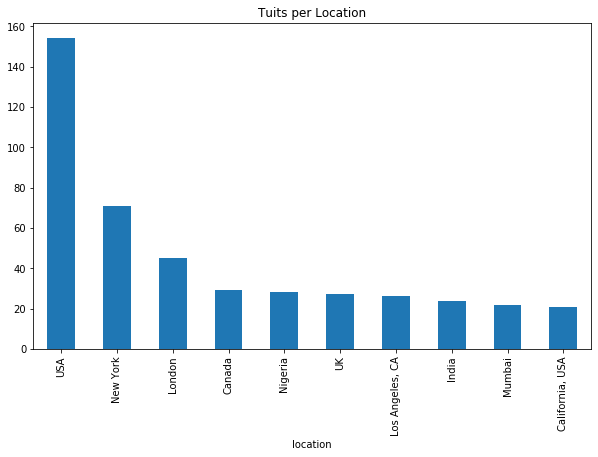

In [13]:
top_locations.loc[:,('target','count')].plot(kind='bar',title='Tuits per Location', linewidth=2, figsize=(10,6))

# ¿Qué location tienen más tuits verdaderos?

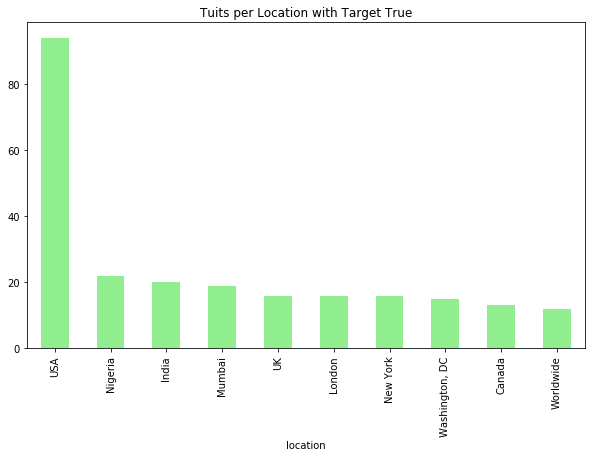

In [14]:
real_twt_by_location = tweets_with_location[tweets_with_location['target']==True].groupby(["location"]).aggregate(
    {'target': ['count']})
top_real_twt_locations = real_twt_by_location.sort_values(('target', 'count'), ascending=False).head(10)
top_real_twt_locations.loc[:,('target','count')].plot(kind='bar',title='Tuits per Location with Target True',
                                                      linewidth=2, figsize=(10,6), color='LightGreen')

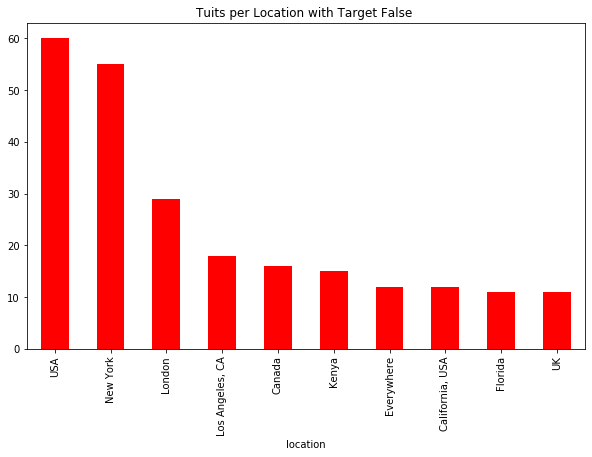

In [15]:
false_twt_by_location = tweets_with_location[tweets_with_location['target']==False].groupby(
    ["location"]).aggregate({'target': ['count']})
top_false_twt_locations = false_twt_by_location.sort_values(('target', 'count'), ascending=False).head(10)
top_false_twt_locations.loc[:,('target','count')].plot(kind='bar',title='Tuits per Location with Target False ',
                                                       linewidth=2, figsize=(10,6), color='Red')

In [16]:
tweets_grouped_by_location_and_target = tweets_with_location.groupby(['location', 'target']).size().nlargest(10)
by_loc_and_tar = tweets_grouped_by_location_and_target
by_loc_and_tar

location         target
USA              True      94
                 False     60
New York         False     55
London           False     29
Nigeria          True      22
India            True      20
Mumbai           True      19
Los Angeles, CA  False     18
Canada           False     16
London           True      16
dtype: int64

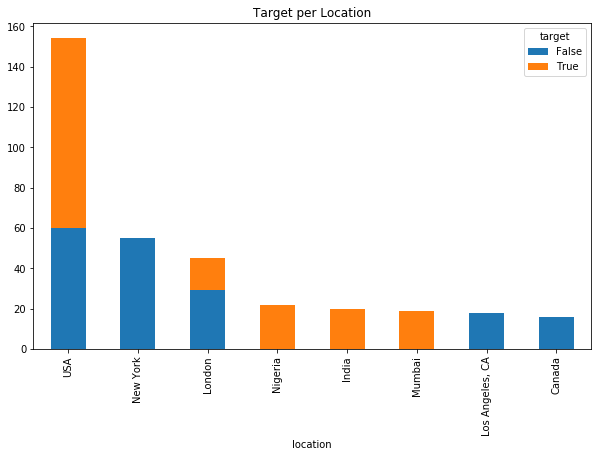

In [17]:
by_loc_and_tar.unstack().plot(kind='bar',title='Target per Location', linewidth=2, figsize=(10,6), stacked=True)


In [19]:
tweets_grouped_by_location_and_target = tweets_with_location.groupby(["location"]).aggregate({"target": ["count"]})
tweets_grouped_by_location_and_target.loc[tweets_grouped_by_location_and_target[('target', 'count')]>5,:]

,target
,count
location,
Road to the Billionaires Club,6
304,9
??????,6
Atlanta,6
"Atlanta, GA",10
...,...
"Washington, DC",21
World,9


In [20]:
tweets_without_location = tweets[tweets["location"].isnull()]
tweets_without_location

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,True
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,True
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,True
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,True
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,True


In [21]:
# Trae todas las location que no tienen ninguna letra válida
twt_wrong_location = tweets_with_location.loc[~tweets_with_location["location"].str.contains('[a-zA-Z0-9]'),:]
twt_wrong_location.count()

id          55
keyword     55
location    55
text        55
target      55
dtype: int64

In [22]:
twt_wrong_location['location'] = 'wrong_location'

/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
twt_wrong_location.head()


,id,keyword,location,text,target
379,544,army,wrong_location,One Direction Is my pick for http://t.co/iMHFd...,False
396,571,arson,wrong_location,Mariah getting thick in the shoulders poor girl.,True
513,739,attacked,wrong_location,TV program I saw said US air plane flew to ura...,True
854,1236,blood,wrong_location,Blood Group A +ve is associated with Gastric ...,False
875,1269,blood,wrong_location,Private thirsty night?SAD BLOOD ROCK'N ROLL? #??,True


In [25]:
tweets_with_location.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,True
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,False
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,True
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,False
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,False


In [26]:
tweets_with_location.loc[~tweets_with_location["location"].str.contains('[a-zA-Z0-9]'),'location'] = 'wrong_location'

/home/gabriel/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [27]:
tweets_with_location.loc[~tweets_with_location["location"].str.contains('[a-zA-Z0-9]'),:]

,id,keyword,location,text,target


In [28]:
tweets_with_location[tweets_with_location["location"] == 'wrong_location']

,id,keyword,location,text,target
379,544,army,wrong_location,One Direction Is my pick for http://t.co/iMHFd...,False
396,571,arson,wrong_location,Mariah getting thick in the shoulders poor girl.,True
513,739,attacked,wrong_location,TV program I saw said US air plane flew to ura...,True
854,1236,blood,wrong_location,Blood Group A +ve is associated with Gastric ...,False
875,1269,blood,wrong_location,Private thirsty night?SAD BLOOD ROCK'N ROLL? #??,True
1107,1600,bombed,wrong_location,'the third generation atomic bombed survivor' ...,True
1465,2113,catastrophe,wrong_location,.@uriminzok The coming catastrophe of the dest...,False
2005,2881,damage,wrong_location,If Trillion crosses the line a 3rd time he doe...,True
2313,3322,demolished,wrong_location,It was finally demolished in the spring of 201...,False
2323,3339,demolished,wrong_location,It was finally demolished in the spring of 201...,False


Agrupé todas las location que sólo tenían caracteres inválidos en una location artificial llamada 'wrong_location' para analizarlas en un conjunto con el resto.
Veamos cómo afecta los gráficos que hicimos antes.

# ¿Qué location tienen más tuits verdaderos ahora? 

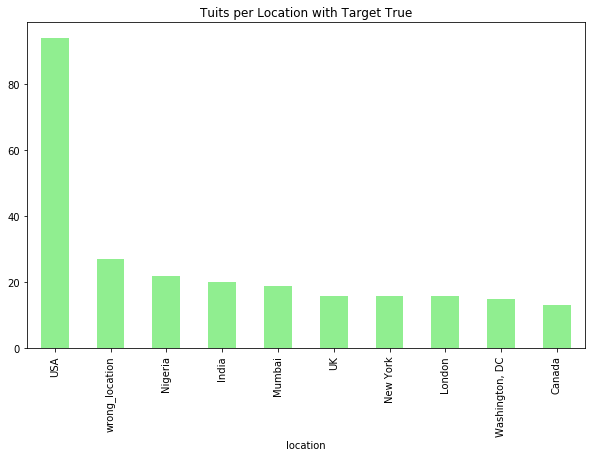

In [44]:
real_twt_by_location = tweets_with_location[tweets_with_location['target']==True].groupby(["location"]).aggregate({'target': ['count']})
top_real_twt_locations = real_twt_by_location.sort_values(('target', 'count'), ascending=False).head(10)
top_real_twt_locations.loc[:,('target','count')].plot(kind='bar',title='Tuits per Location with Target True', linewidth=2, figsize=(10,6), color='LightGreen')

# ¿Y el top de tuits falsos?

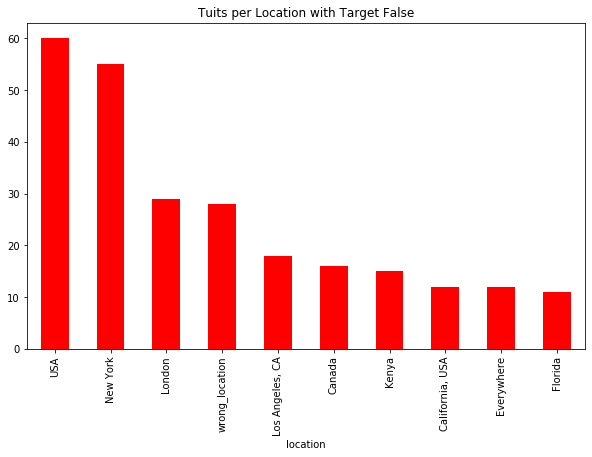

# La relación entre verdaderos y falsos

location         target
USA              True      94
                 False     60
New York         False     55
London           False     29
wrong_location   False     28
                 True      27
Nigeria          True      22
India            True      20
Mumbai           True      19
Los Angeles, CA  False     18
dtype: int64


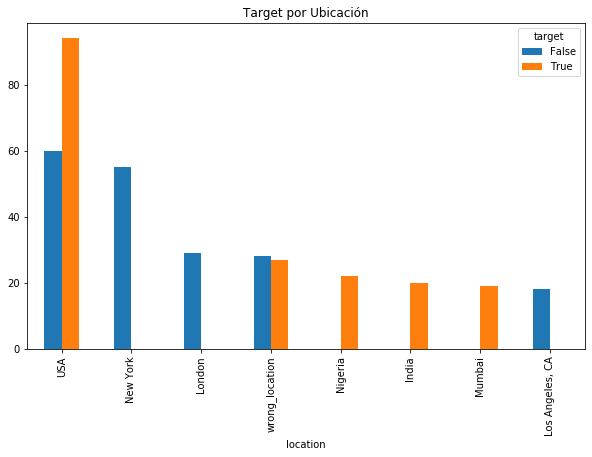

In [66]:
tweets_grouped_by_location_and_target = tweets_with_location.groupby(['location', 'target']).size().nlargest(10)
by_loc_and_tar = tweets_grouped_by_location_and_target
print(by_loc_and_tar)
by_loc_and_tar.unstack().plot(kind='bar',title='Target por Ubicación', linewidth=2, figsize=(10,6), stacked=False)


In [34]:
tweets['text_length'] = tweets['text'].str.len()
disaster_tweets = tweets.loc[tweets["target"]==1]
disaster_tweets

,id,keyword,location,text,target,text_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,True,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,True,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,True,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,True,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,True,137


In [35]:
disaster_tweets["text_length"].agg(["mean", "max", "min"])

mean    108.113421
max     151.000000
min      14.000000
Name: text_length, dtype: float64

In [36]:
not_disaster_tweets = tweets.loc[tweets["target"]==0]
not_disaster_tweets

,id,keyword,location,text,target,text_length
15,23,NaN,NaN,What's up man?,False,14
16,24,NaN,NaN,I love fruits,False,13
17,25,NaN,NaN,Summer is lovely,False,16
18,26,NaN,NaN,My car is so fast,False,17
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,False,28
...,...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,False,104
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,False,80
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,False,127
7587,10841,NaN,NaN,Sirens everywhere!,False,18


In [37]:
not_disaster_tweets["text_length"].agg(["mean", "max", "min"])

mean     95.706817
max     157.000000
min       7.000000
Name: text_length, dtype: float64

# ¿Y si agregamos los que tienen location null?

In [60]:
tweets.loc[tweets["location"].isna(),'location'] = 'No Location'
tweets.loc[~tweets["location"].str.contains('[a-zA-Z0-9]'),'location'] = 'wrong_location'

                                         target
                                          count
location                                       
  News                                        1
 616 Û¢ Kentwood , MI                        1
 Alberta                                      1
 Baku & Erzurum                               1
 Bouvet Island                                1
...                                         ...
ÌÏT: 39.982988,-75.261624                     1
ÌÏT: 40.562796,-75.488849                     1
ÌÏT: 41.252426,-96.072013                     1
ÌÏT: 6.4682,3.18287                           1
ÌÏT: 6.488400524109015,3.352798039832285      1

[1493 rows x 1 columns]


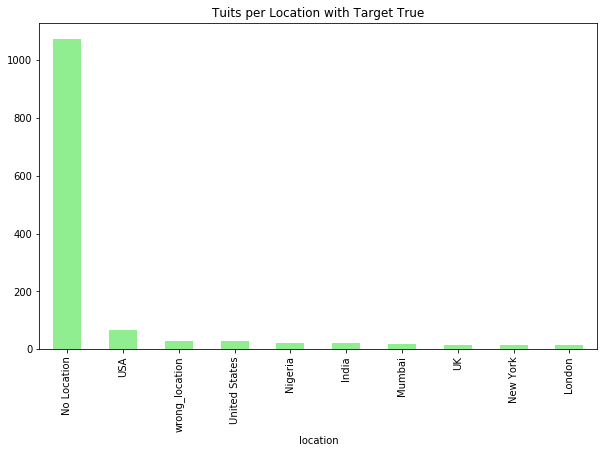

In [61]:
real_twt_by_location = tweets[tweets['target']==True].groupby(["location"]).aggregate({'target': ['count']})
print(real_twt_by_location)
top_real_twt_locations = real_twt_by_location.sort_values(('target', 'count'), ascending=False).head(10)
top_real_twt_locations.loc[:,('target','count')].plot(kind='bar',title='Tuits per Location with Target True', linewidth=2, figsize=(10,6), color='LightGreen')

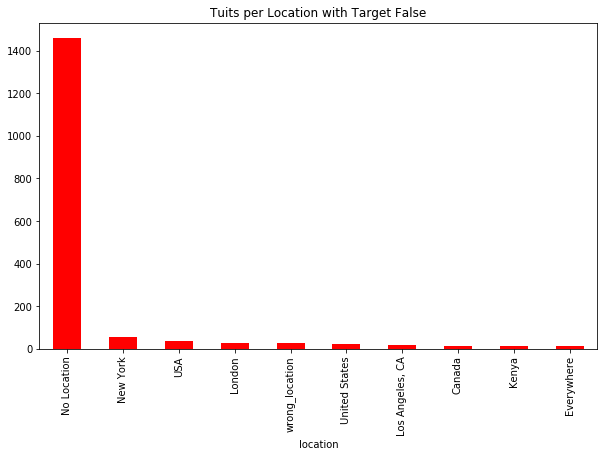

In [62]:
false_twt_by_location = tweets[tweets['target']==False].groupby(["location"]).aggregate({'target': ['count']})
top_false_twt_locations = false_twt_by_location.sort_values(('target', 'count'), ascending=False).head(10)
top_false_twt_locations.loc[:,('target','count')].plot(kind='bar',title='Tuits per Location with Target False', linewidth=2, figsize=(10,6), color='Red')

location        target
No Location     False     1458
                True      1075
USA             True        67
New York        False       55
USA             False       37
London          False       29
wrong_location  False       28
United States   True        27
wrong_location  True        27
United States   False       23
dtype: int64


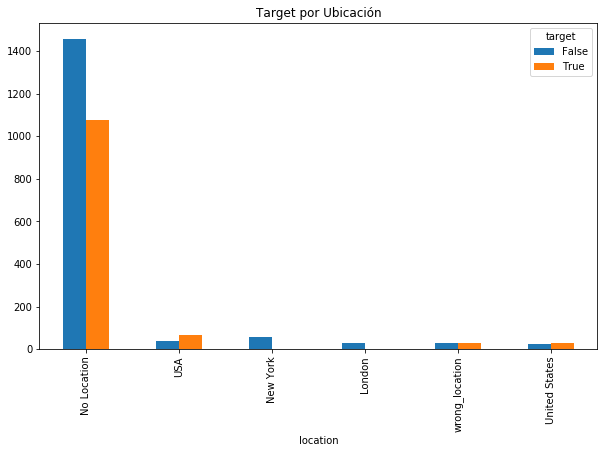

In [65]:
tweets_grouped_by_location_and_target = tweets.groupby(['location', 'target']).size().nlargest(10)
by_loc_and_tar = tweets_grouped_by_location_and_target
print(by_loc_and_tar)
by_loc_and_tar.unstack().plot(kind='bar',title='Target por Ubicación', linewidth=2, figsize=(10,6), stacked=False)


# How is the length distribution in tweets about real disasters?

Text(0.5, 1.0, 'Length distribution in real disasters tweets')

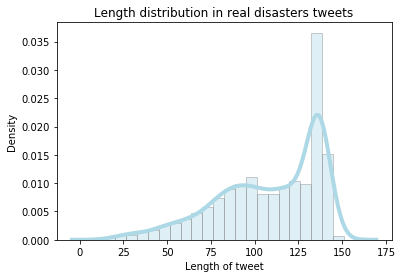

In [38]:
# Density Plot and Histogram using sns
sns.distplot(disaster_tweets['text_length'], hist=True, kde=True, 
             color = 'lightblue', 
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 4})

plt.xlabel('Length of tweet')
plt.ylabel('Density')
plt.title('Length distribution in real disasters tweets')


# How is the length distribution in tweets that are not about real disasters?

Text(0.5, 1.0, 'Length distribution in NOT real disasters tweets')

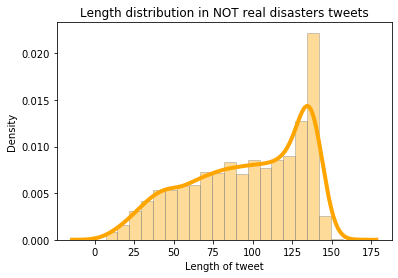

In [39]:
sns.distplot(not_disaster_tweets['text_length'], hist=True, kde=True, 
             color = 'orange', 
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 4})

plt.xlabel('Length of tweet')
plt.ylabel('Density')
plt.title('Length distribution in NOT real disasters tweets')

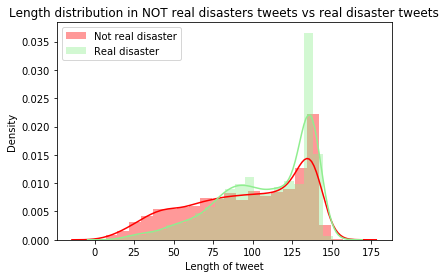

In [45]:
sns.distplot( not_disaster_tweets['text_length'] , color="red", label="Not real disaster")
sns.distplot( disaster_tweets['text_length'] , color="lightgreen", label="Real disaster")

plt.xlabel('Length of tweet')
plt.ylabel('Density')
plt.title('Length distribution in NOT real disasters tweets vs real disaster tweets')
plt.legend()
plt.show()